In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
from numpy.linalg import inv
from sklearn.model_selection import train_test_split
from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score, confusion_matrix,accuracy_score
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

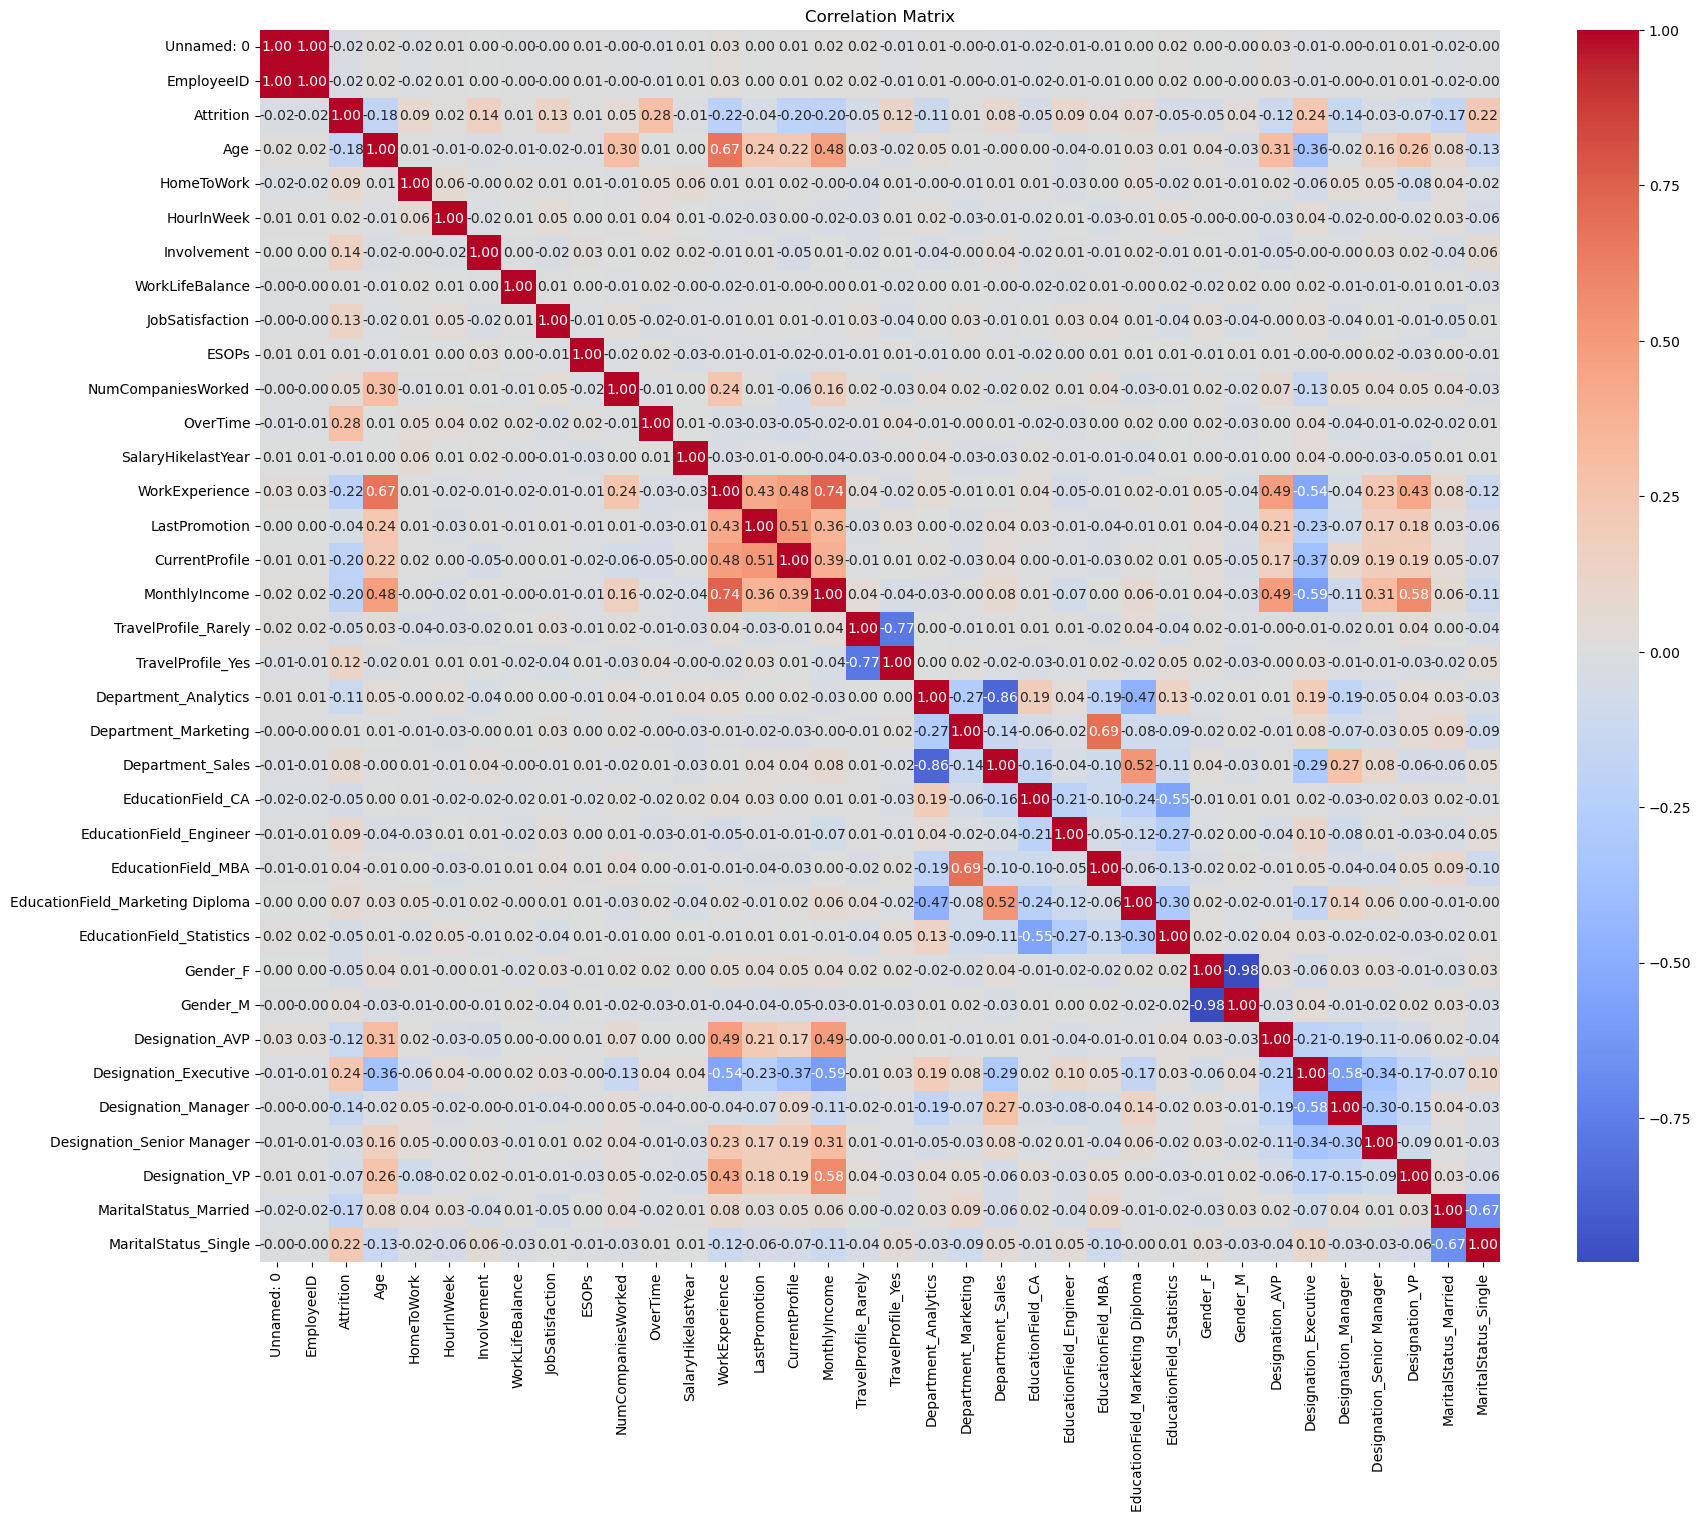

In [2]:
df = pd.read_csv(r".\dataset\raw\CleanDataset.csv")
corr = df.corr()
plt.figure(figsize=(20, 16))  # optional: adjust size
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [3]:
X=df.drop(columns=['Unnamed: 0','EmployeeID','Attrition','Department_Sales','HomeToWork','NumCompaniesWorked','Department_Sales','EducationField_Marketing Diploma','Gender_M','HourlnWeek','EducationField_CA','WorkLifeBalance','TravelProfile_Rarely','EducationField_Statistics','ESOPs','SalaryHikelastYear','Department_Marketing'],axis=1)

In [4]:
df.columns

Index(['Unnamed: 0', 'EmployeeID', 'Attrition', 'Age', 'HomeToWork',
       'HourlnWeek', 'Involvement', 'WorkLifeBalance', 'JobSatisfaction',
       'ESOPs', 'NumCompaniesWorked', 'OverTime', 'SalaryHikelastYear',
       'WorkExperience', 'LastPromotion', 'CurrentProfile', 'MonthlyIncome',
       'TravelProfile_Rarely', 'TravelProfile_Yes', 'Department_Analytics',
       'Department_Marketing', 'Department_Sales', 'EducationField_CA',
       'EducationField_Engineer', 'EducationField_MBA',
       'EducationField_Marketing Diploma', 'EducationField_Statistics',
       'Gender_F', 'Gender_M', 'Designation_AVP', 'Designation_Executive',
       'Designation_Manager', 'Designation_Senior Manager', 'Designation_VP',
       'MaritalStatus_Married', 'MaritalStatus_Single'],
      dtype='object')

In [5]:
y=df['Attrition']

In [6]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

In [7]:
scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

In [8]:
Xtrain_scaled

array([[ 0.65598326,  0.89748929, -0.10945613, ...,  4.85681043,
         1.09653133, -0.71984107],
       [ 1.75817813,  0.89748929,  0.63657383, ..., -0.20589644,
         1.09653133, -0.71984107],
       [ 0.10488583, -0.25097774, -0.85548609, ..., -0.20589644,
        -0.91196665, -0.71984107],
       ...,
       [-0.33599212, -0.25097774, -0.10945613, ..., -0.20589644,
        -0.91196665, -0.71984107],
       [ 0.21510532, -0.25097774, -0.10945613, ..., -0.20589644,
        -0.91196665, -0.71984107],
       [ 1.75817813,  0.89748929, -0.10945613, ...,  4.85681043,
        -0.91196665,  1.38919554]])

In [9]:
prior_mean = np.zeros(Xtrain_scaled.shape[1]) #p_m

In [10]:
prior_mean

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [11]:
lam = 2
prior_variance = np.eye(Xtrain_scaled.shape[1])/lam 

In [12]:
prior_variance

array([[0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0

In [13]:
def logJointLikelihood(X, t, w, p_m, p_v):

    p = 1/(1+np.exp(-X.dot(w)))
    loglikelihood =  np.sum((t*np.log1p(p)+(1-t)*np.log1p(1-p)))
    #z=X.dot(w)
    #loglikelihood = -np.sum(t * softplus(-z) + (1 - t) * softplus(z))
    logPrior = np.log(multivariate_normal.pdf(w, p_m, p_v))
    
    logJointLikelihood = (loglikelihood + logPrior)
    
    NeglogJointLikelihood= -1*logJointLikelihood

    return NeglogJointLikelihood

In [14]:
def logJointLikelihood_grad(X, t, w, p_m, p_v):

 
    p = 1/(1 + np.exp(-X.dot(w)))
    
    
    grad = X.T.dot(p-t)+ inv(p_v).dot(w-p_m)  

    return grad

In [15]:
def logJointLikelihood_hess(X, t, w, p_m, p_v):

   
    p = 1/(1 + np.exp(-X.dot(w)))
    
    hess = (( X.T*(p*(1-p)))).dot(X)+inv(p_v)

    return hess

In [16]:
def GradientDescent(X, t, w, p_m, p_v, eta, tol, max_iter):

    log_joint_likelihood = 1e5
    log_joint_likelihoods = []
    w_history=[]
    w_history.append(w)
    w_opt = 0

    for i in range(max_iter):
        


        grad = logJointLikelihood_grad(X, t, w, p_m, p_v)
        #print(grad)

        # update the coefficient for next step
        w_new =  w - eta* grad  #fill in
        w_history.append(w_new)

        # check convergence
        log_joint_likelihood_new = logJointLikelihood(X, t, w_new, p_m, p_v)
        #print(log_joint_likelihood_new)
        if (abs(log_joint_likelihood_new - log_joint_likelihood) < tol):
            break
        else:
            log_joint_likelihoods.append(log_joint_likelihood_new)
            log_joint_likelihood, w = log_joint_likelihood_new, w_new
            

    w_opt = w_new
    return w_opt, np.array(log_joint_likelihoods), w_history

In [17]:
def NewtonRaphson(X, t, w, p_m, p_v, eta, tol, max_iter):

    # hyper-parameters setting (Note: 'loss' is set to large value to avoid first time stop)
    log_joint_likelihood = 1e5
    log_joint_likelihoods = []
    w_opt = 0
    w_history= []
    w_history.append(w)

    for i in range(max_iter):

        # find the next step length.
        grad = logJointLikelihood_grad(X, t, w, p_m, p_v)
        
        hess = logJointLikelihood_hess(X, t, w, p_m, p_v)
        

        # update the coefficient for next step
        w_new =   w-eta*(inv(hess)*grad)
        w_history.append(w_new)

        # check convergence
        log_joint_likelihood_new = logJointLikelihood(X, t, w_new, p_m, p_v)
        if (abs(log_joint_likelihood_new - log_joint_likelihood) < tol):
            break
        else:
            log_joint_likelihoods.append(log_joint_likelihood_new)
            log_joint_likelihood, w = log_joint_likelihood_new, w_new
            

        w_opt = w_new

    return w_opt, log_joint_likelihoods, w_history

In [18]:
class BayesianLogistic(object):



    def __init__(self, p_m, p_v, solver, eta=1e-4, tol=1e-5, max_iter=100):


        self.p_m = p_m
        self.p_v = p_v
        self.solver = solver
        self.eta = eta
        self.tol = tol
        self.max_iter = max_iter


    def fit(self, X, t):

        w_init = 1e-3*np.ones(X.shape[1])

        if (self.solver == 'gd'):
            self.coef_, self.log_joint_likelihood_, self.weight_history_ = GradientDescent(X, t, w_init, self.p_m, self.p_v, self.eta, self.tol, self.max_iter)
            #print(self.log_joint_likelihood_)
        else:
            self.coef_, self.log_joint_likelihood_, self.weight_history_ = NewtonRaphson(X, t, w_init, self.p_m, self.p_v, self.eta, self.tol, self.max_iter)

        return self


    def predict(self, X):


        pred = []

        for p in 1/(1+np.exp(-X.dot(self.coef_))):
            if p <= 0.4:
                pred.append(0)
            else:
                pred.append(1)

        return np.array(pred)

In [26]:
model = BayesianLogistic(p_m=prior_mean, p_v=prior_variance, solver='gd', eta=1e-3, max_iter=100) #try changing eta and max_iter for better convergence
model.fit(Xtrain_scaled, ytrain)

In [27]:
model.coef_

array([ 0.02777006,  0.30895329,  0.40249686,  0.82742184,  0.16484245,
        0.52740915, -0.22504973, -0.28805729,  0.33815768, -0.40799037,
        0.17793768,  0.0029632 , -0.16150666,  0.00852162, -0.43867359,
       -0.4206169 ,  0.13748254,  0.21111277, -0.0179581 ,  0.48961422])

In [28]:
ypred=model.predict(Xtest_scaled)

In [29]:
values, counts = np.unique(ypred, return_counts=True)

for val, count in zip(values, counts):
    print(f"Value: {val}, Count: {count}")

Value: 0, Count: 540
Value: 1, Count: 755


In [30]:
f1_score(ytest,ypred)

0.5265049415992813

In [31]:
accuracy_score(ytest,ypred)

0.593050193050193

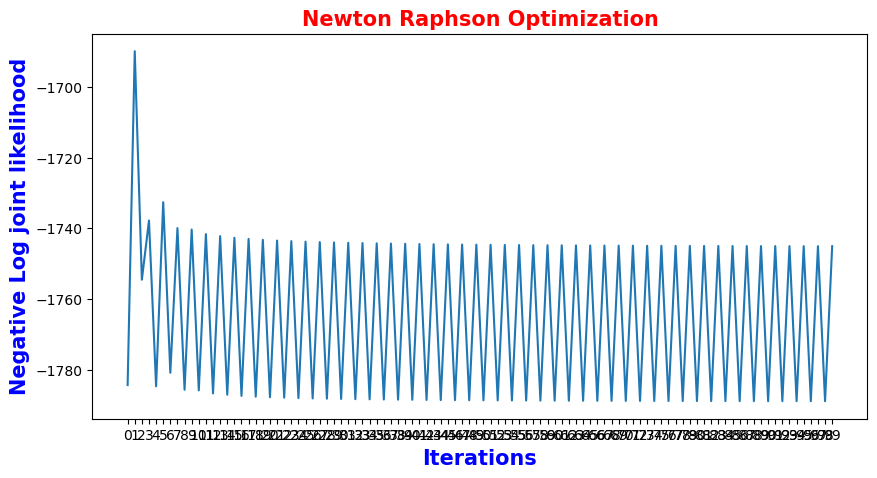

In [32]:
plt.figure(figsize=(10,5))
plt.plot(range(len(model.log_joint_likelihood_)), np.array(model.log_joint_likelihood_))
plt.xlabel("Iterations", weight="semibold", color='b', size=15)
plt.ylabel("Negative Log joint likelihood", weight="semibold", color='b', size=15)
plt.xticks(range(len(model.log_joint_likelihood_)))
plt.title("Newton Raphson Optimization", weight="semibold", color='r', size=15)
plt.show()